# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [53]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from scipy.stats import linregress


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
weather_api_key

'b0a45ae433134b95fe576791fc1d2bf3'

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


In [4]:
city

'chiredzi'

In [5]:
url = "https://api.openweathermap.org/data/2.5/weather?"
measurement = "metric"
city_url = url + "q=" + city + "&appid=" + weather_api_key + "&units=" + measurement

city_url

city_weather = requests.get(city_url).json()
print(city_weather.keys())



dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])


In [6]:
city_weather[

1696901950

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [62]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Set the measurment to celsius 
measurement = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "q=" + city + "&appid=" + weather_api_key + "&units=" + measurement
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lon']
        city_lng = city_weather['coord']['lat']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bilibino
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | abu jibeha
Processing Record 4 of Set 1 | olonkinbyen
Processing Record 5 of Set 1 | vilyuchinsk
Processing Record 6 of Set 1 | lyubinskiy
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | qaqortoq
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | newnham
Processing Record 13 of Set 1 | tay ninh
Processing Record 14 of Set 1 | hirtshals
Processing Record 15 of Set 1 | blackmans bay
Processing Record 16 of Set 1 | port lincoln
Processing Record 17 of Set 1 | hassi messaoud
Processing Record 18 of Set 1 | lionel town
Processing Record 19 of Set 1 | santa ines
Processing Record 20 of Set 1 | ribeira grande
Processing Record 21 of Set 1 | ilulissat
Processing Record 22 of Set 1 | quellon
Processing R

Processing Record 38 of Set 4 | kenora
Processing Record 39 of Set 4 | bekovo
Processing Record 40 of Set 4 | vorgashor
Processing Record 41 of Set 4 | moratalla
Processing Record 42 of Set 4 | durant
Processing Record 43 of Set 4 | edd
Processing Record 44 of Set 4 | oshawa
Processing Record 45 of Set 4 | celestun
Processing Record 46 of Set 4 | petropavlovsk-kamchatsky
Processing Record 47 of Set 4 | jamestown
Processing Record 48 of Set 4 | walvis bay
Processing Record 49 of Set 4 | lompoc
Processing Record 0 of Set 5 | santa ana
Processing Record 1 of Set 5 | ijuw
City not found. Skipping...
Processing Record 2 of Set 5 | anadyr
Processing Record 3 of Set 5 | san patricio
Processing Record 4 of Set 5 | port saint john's
Processing Record 5 of Set 5 | remire-montjoly
Processing Record 6 of Set 5 | shiyan
Processing Record 7 of Set 5 | alto barinas
Processing Record 8 of Set 5 | ampanihy
Processing Record 9 of Set 5 | kingscliff
Processing Record 10 of Set 5 | callao
Processing Recor

Processing Record 31 of Set 8 | anna regina
Processing Record 32 of Set 8 | mosfellsbaer
Processing Record 33 of Set 8 | komsomolsk-on-amur
Processing Record 34 of Set 8 | morondava
Processing Record 35 of Set 8 | kendari
Processing Record 36 of Set 8 | boa vista
Processing Record 37 of Set 8 | portland
Processing Record 38 of Set 8 | bejubang dua
City not found. Skipping...
Processing Record 39 of Set 8 | along
Processing Record 40 of Set 8 | smithers
Processing Record 41 of Set 8 | sal rei
Processing Record 42 of Set 8 | swift current
Processing Record 43 of Set 8 | mahajanga
Processing Record 44 of Set 8 | galesong
Processing Record 45 of Set 8 | grand rapids
Processing Record 46 of Set 8 | borisoglebskiy
Processing Record 47 of Set 8 | ramadi
Processing Record 48 of Set 8 | kavaratti
Processing Record 49 of Set 8 | barah
Processing Record 0 of Set 9 | paranhos
Processing Record 1 of Set 9 | novyy urgal
Processing Record 2 of Set 9 | padangsidempuan
Processing Record 3 of Set 9 | ch

Processing Record 20 of Set 12 | giyani
Processing Record 21 of Set 12 | elmendorf air force base
City not found. Skipping...
Processing Record 22 of Set 12 | gardnerville ranchos
Processing Record 23 of Set 12 | da nang
Processing Record 24 of Set 12 | yeed
Processing Record 25 of Set 12 | tucupita
Processing Record 26 of Set 12 | agadez
Processing Record 27 of Set 12 | antofagasta
Processing Record 28 of Set 12 | mwene-ditu
Processing Record 29 of Set 12 | bayan nur
City not found. Skipping...
Processing Record 30 of Set 12 | lamu
Processing Record 31 of Set 12 | cannonvale
Processing Record 32 of Set 12 | takhatpur
Processing Record 33 of Set 12 | samamea
City not found. Skipping...
Processing Record 34 of Set 12 | marica
Processing Record 35 of Set 12 | puerto lempira
Processing Record 36 of Set 12 | amga
Processing Record 37 of Set 12 | sinop
Processing Record 38 of Set 12 | pocao de pedras
Processing Record 39 of Set 12 | igarka
Processing Record 40 of Set 12 | sandnessjoen
Proce

In [63]:
city_data

[{'City': 'bilibino',
  'Lat': 166.4372,
  'Lng': 68.0546,
  'Max Temp': -8.36,
  'Humidity': 96,
  'Cloudiness': 99,
  'Wind Speed': 0.58,
  'Country': 'RU',
  'Date': 1696905256},
 {'City': 'grytviken',
  'Lat': -36.5092,
  'Lng': -54.2811,
  'Max Temp': 0.32,
  'Humidity': 78,
  'Cloudiness': 45,
  'Wind Speed': 4.94,
  'Country': 'GS',
  'Date': 1696905256},
 {'City': 'abu jibeha',
  'Lat': 31.2285,
  'Lng': 11.4562,
  'Max Temp': 25.24,
  'Humidity': 58,
  'Cloudiness': 79,
  'Wind Speed': 2.06,
  'Country': 'SD',
  'Date': 1696905257},
 {'City': 'olonkinbyen',
  'Lat': -8.7187,
  'Lng': 70.9221,
  'Max Temp': 2.55,
  'Humidity': 89,
  'Cloudiness': 100,
  'Wind Speed': 6.64,
  'Country': 'SJ',
  'Date': 1696905258},
 {'City': 'vilyuchinsk',
  'Lat': 158.4028,
  'Lng': 52.9306,
  'Max Temp': 7.18,
  'Humidity': 84,
  'Cloudiness': 100,
  'Wind Speed': 2.28,
  'Country': 'RU',
  'Date': 1696905258},
 {'City': 'lyubinskiy',
  'Lat': 72.6925,
  'Lng': 55.1542,
  'Max Temp': 13.85,
  

In [64]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [65]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bilibino,166.4372,68.0546,-8.36,96,99,0.58,RU,1696905256
1,grytviken,-36.5092,-54.2811,0.32,78,45,4.94,GS,1696905256
2,abu jibeha,31.2285,11.4562,25.24,58,79,2.06,SD,1696905257
3,olonkinbyen,-8.7187,70.9221,2.55,89,100,6.64,SJ,1696905258
4,vilyuchinsk,158.4028,52.9306,7.18,84,100,2.28,RU,1696905258


In [68]:
#Creating a directory to store the city_Data csv file if the directory does not exist
outdir = '../output_data'
if not os.path.exists(outdir):
    os.mkdir(outdir)

# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [69]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bilibino,166.4372,68.0546,-8.36,96,99,0.58,RU,1696905256
1,grytviken,-36.5092,-54.2811,0.32,78,45,4.94,GS,1696905256
2,abu jibeha,31.2285,11.4562,25.24,58,79,2.06,SD,1696905257
3,olonkinbyen,-8.7187,70.9221,2.55,89,100,6.64,SJ,1696905258
4,vilyuchinsk,158.4028,52.9306,7.18,84,100,2.28,RU,1696905258


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

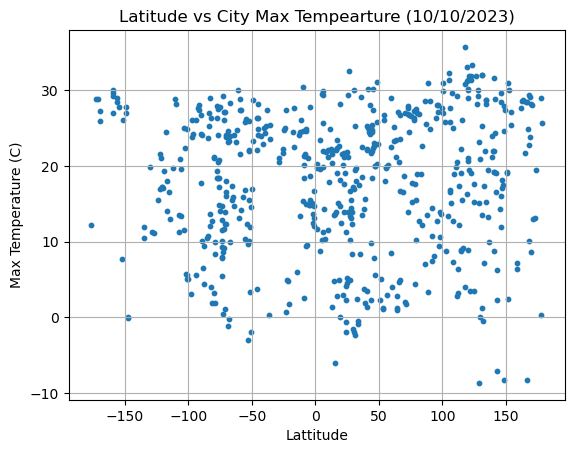

In [71]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df['Lat']
y_axis = city_data_df['Max Temp']

plt.scatter(x_axis,y_axis, s= 10)

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Lattitude")
plt.ylabel("Max Temperature (C)")
plt.title("Latitude vs City Max Tempearture (10/10/2023)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

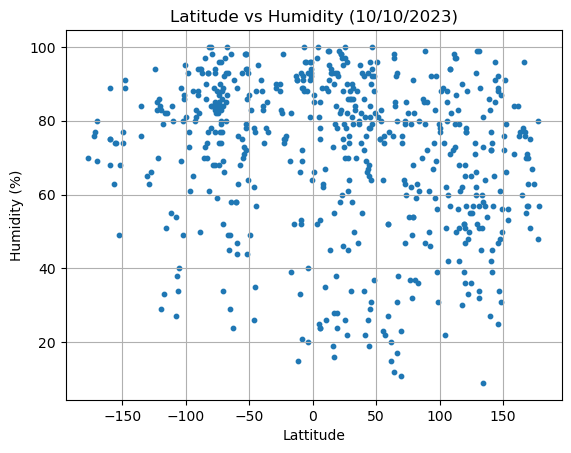

In [73]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df['Lat']
y_axis = city_data_df['Humidity']

plt.scatter(x_axis,y_axis, s= 10)

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Lattitude")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs Humidity (10/10/2023)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

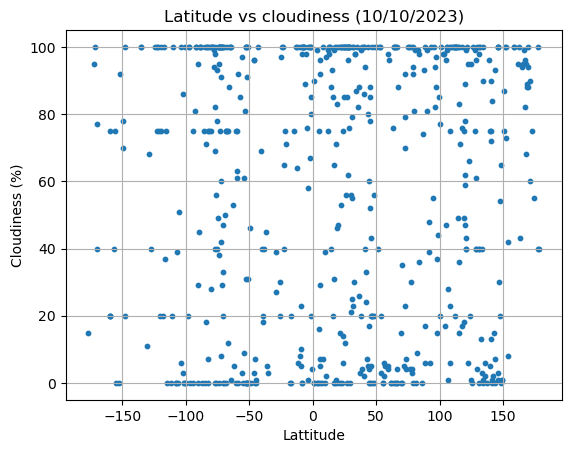

In [75]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df['Lat']
y_axis = city_data_df['Cloudiness']

plt.scatter(x_axis,y_axis, s= 10)

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Lattitude")
plt.ylabel("Cloudiness (%)")
plt.title("Latitude vs cloudiness (10/10/2023)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

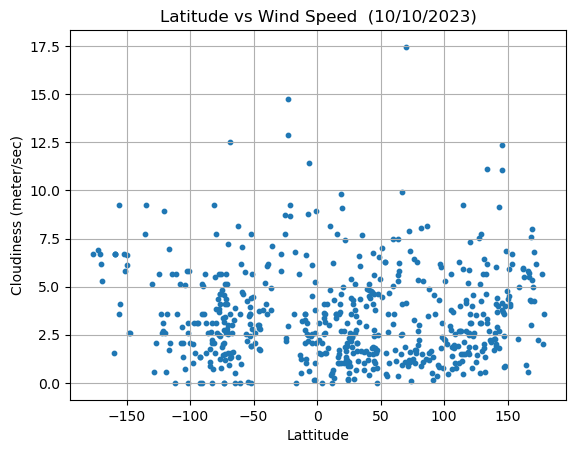

In [76]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df['Lat']
y_axis = city_data_df['Wind Speed']

plt.scatter(x_axis,y_axis, s= 10)

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Lattitude")
plt.ylabel("Cloudiness (meter/sec)")
plt.title("Latitude vs Wind Speed  (10/10/2023)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE